In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-dark')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [4]:
rcb_srh=matches[((matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')) & ((matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad'))].copy()
rcb=matches[(matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')].copy()
srh=matches[(matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad')].copy()
rcb_srh.shape,rcb.shape,srh.shape

((25, 18), (180, 18), (183, 18))

In [5]:
rcb_srhdeli=deliveries[((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')) & ((deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad'))].copy()
rcbdeli=deliveries[(deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')].copy()
srhdeli=deliveries[(deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad')].copy()
rcb_srhdeli.shape,rcbdeli.shape,srhdeli.shape

((5971, 21), (42144, 21), (43760, 21))

In [6]:
rcb_srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
79,80,2008,Hyderabad,2008-05-25,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN
110,111,2008,Bangalore,2008-05-03,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri,NaN
123,124,2009,Cape Town,2009-04-22,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,24,0,AC Gilchrist,Newlands,M Erasmus,AM Saheba,NaN
170,171,2009,Centurion,2009-05-21,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,12,0,MK Pandey,SuperSport Park,IL Howell,S Ravi,NaN


In [7]:
rcb.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN


In [8]:
srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [9]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['yellow','yellowgreen'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

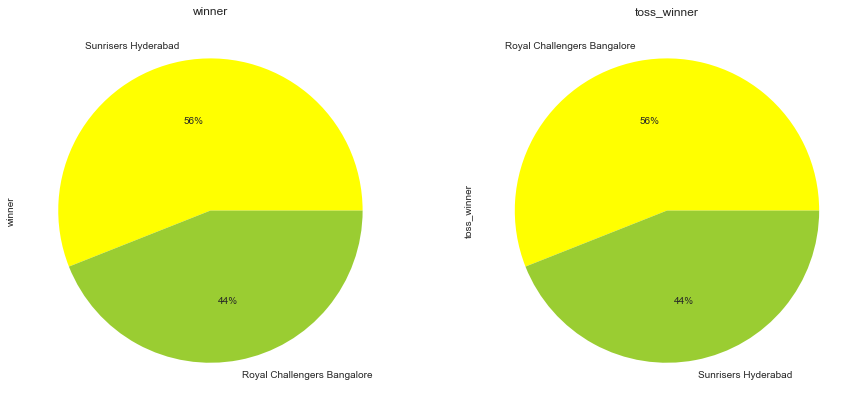

In [10]:
cat_plot(rcb_srh,['winner','toss_winner'],(15,8),'pie')

In [11]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='navy')
        ax[i].set_title(columns[i])

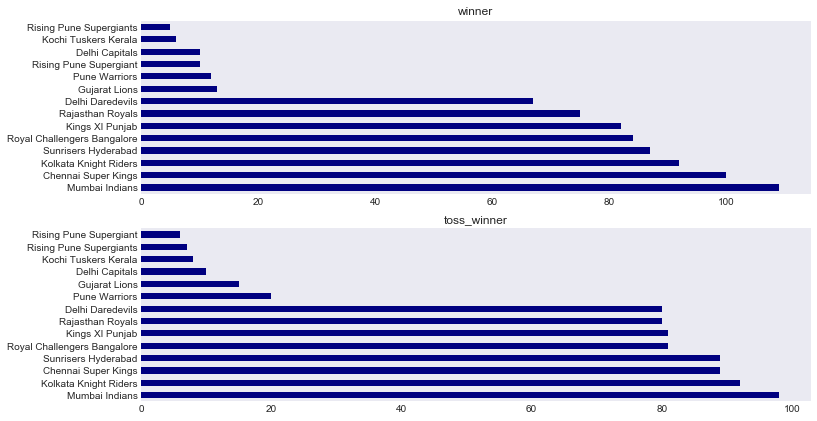

In [12]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')


### The conclusion we can infer from the above findings is that SRH is the winner if we consider overall data but when it comes to head on data the answer becomes quite awkward but we will go SRH as it is a good in overall data.

# Q2

In [13]:
matchtotal=rcb_srhdeli.groupby('match_id').sum().total_runs
matchtotal.describe()

count     25.000000
mean     327.600000
std       58.928629
min      168.000000
25%      301.000000
50%      328.000000
75%      366.000000
max      431.000000
Name: total_runs, dtype: float64

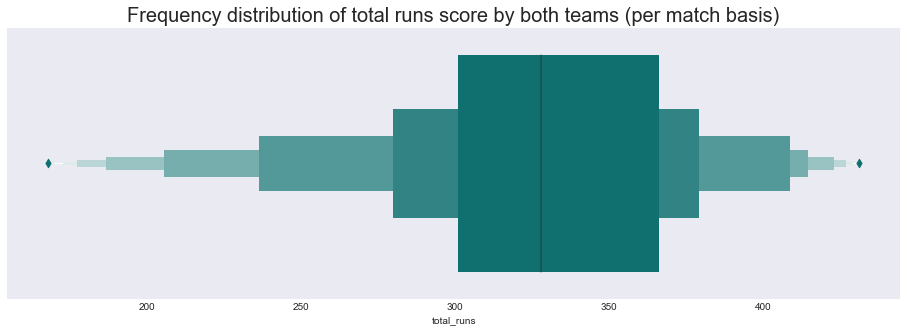

In [14]:
plt.figure(figsize=(16,5))
sns.boxenplot(matchtotal,color='teal')
plt.title('Frequency distribution of total runs score by both teams (per match basis)',fontsize=20)
plt.show()

### As we can observe from the above distribution the teams will most likely score around 300-325 runs

# Q3

In [16]:

match_data=[]
for match in rcb_srhdeli.query('batting_team=="Sunrisers Hyderabad"').match_id:
    counter=0
    for runs in rcb_srhdeli.query('batting_team=="Sunrisers Hyderabad"')[[rcb_srhdeli.match_id==match]].total_runs:
        counter+=runs
        match_data.append((counter,match))
match       
        

ValueError: Item wrong length 1 instead of 3031.

# Q4

In [17]:
rcb_wickets=rcb_srhdeli.query('over<=6 & batting_team=="Royal Challengers Bangalore"').groupby('match_id').player_dismissed.count()
srh_wickets=rcb_srhdeli.query('over<=6 & batting_team=="Sunrisers Hyderabad"').groupby('match_id').player_dismissed.count()

In [18]:
rcb_wickets.describe()

count    25.000000
mean      1.480000
std       1.004988
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: player_dismissed, dtype: float64

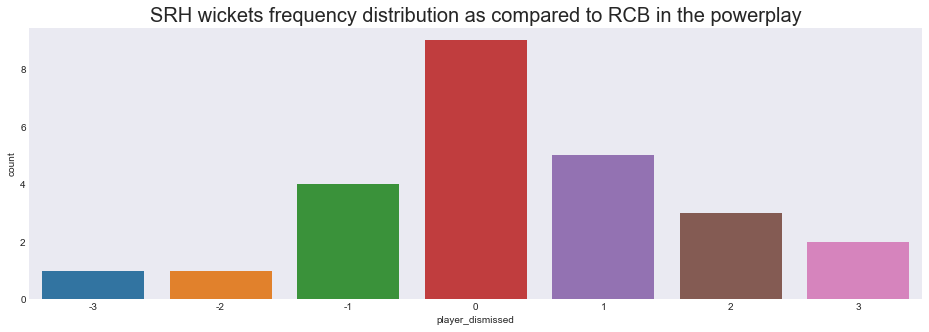

In [19]:
fig=plt.figure(figsize=(16,5))

sns.countplot(rcb_wickets-srh_wickets)
plt.title('SRH wickets frequency distribution as compared to RCB in the powerplay',fontsize=20)
plt.show()

### As we can see SRH is likely to lose 0-1 wickets more as compared to RCB

# Q5

In [20]:
dotballs=rcb_srhdeli[rcb_srhdeli.batsman_runs==0].groupby(['match_id']).count().ball
dotballs.describe()

count     25.000000
mean      92.040000
std       19.212583
min       25.000000
25%       85.000000
50%       95.000000
75%      101.000000
max      119.000000
Name: ball, dtype: float64

Text(0.5, 1.0, 'Dot ball Frequency distribution of RCB and SRH')

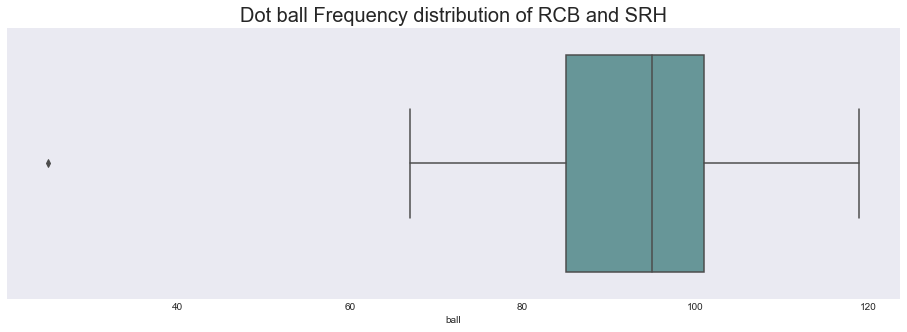

In [21]:
# dotballs.plot.hist(figsize=(12,5),color='purple')
plt.figure(figsize=(16,5))
sns.boxplot(dotballs,color='cadetblue')
plt.title('Dot ball Frequency distribution of RCB and SRH',fontsize=20)

### As we can see dot balls are likely to happen within the range of 83 to 101